In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
mon=pd.read_csv("monday.csv",sep=";")
tue=pd.read_csv("tuesday.csv",sep=";")
wed=pd.read_csv("wednesday.csv",sep=";")
thu=pd.read_csv("thursday.csv",sep=";")
fri=pd.read_csv("friday.csv",sep=";")

In [44]:
mon.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


In [45]:
mon["weekday"]="monday"
tue["weekday"]="tuesday"
wed["weekday"]="wednesday"
thu["weekday"]="thurday"
fri["weekday"]="friday"

In [46]:
mon.head()

,timestamp,customer_no,location,weekday
0,2019-09-02 07:03:00,1,dairy,monday
1,2019-09-02 07:03:00,2,dairy,monday
2,2019-09-02 07:04:00,3,dairy,monday
3,2019-09-02 07:04:00,4,dairy,monday
4,2019-09-02 07:04:00,5,spices,monday


In [47]:
mon_count=mon["customer_no"].count()
print("monday total customer:", mon_count)

tue_count=tue["customer_no"].count()
print("tuesday total customer:", tue_count)

wed_count=wed["customer_no"].count()
print("wednesday total customer:", wed_count)

thu_count=thu["customer_no"].count()
print("thursday total customer:", thu_count)

fri_count=fri["customer_no"].count()
print("friday total customer:", fri_count)

monday total customer: 4884
tuesday total customer: 4714
wednesday total customer: 5050
thursday total customer: 5104
friday total customer: 5125


In [53]:
df=pd.concat([mon,tue,wed,thu,fri])

In [54]:
df

,timestamp,customer_no,location,weekday
0,2019-09-02 07:03:00,1,dairy,monday
1,2019-09-02 07:03:00,2,dairy,monday
2,2019-09-02 07:04:00,3,dairy,monday
3,2019-09-02 07:04:00,4,dairy,monday
4,2019-09-02 07:04:00,5,spices,monday
...,...,...,...,...
5120,2019-09-06 21:50:00,1500,dairy,friday
5121,2019-09-06 21:50:00,1507,checkout,friday
5122,2019-09-06 21:50:00,1508,checkout,friday
5123,2019-09-06 21:50:00,1509,drinks,friday


In [63]:
df["timestamp"]=pd.to_datetime(df["timestamp"])

In [65]:
df

,timestamp,customer_no,location,weekday
0,2019-09-02 07:03:00,1,dairy,monday
1,2019-09-02 07:03:00,2,dairy,monday
2,2019-09-02 07:04:00,3,dairy,monday
3,2019-09-02 07:04:00,4,dairy,monday
4,2019-09-02 07:04:00,5,spices,monday
...,...,...,...,...
5120,2019-09-06 21:50:00,1500,dairy,friday
5121,2019-09-06 21:50:00,1507,checkout,friday
5122,2019-09-06 21:50:00,1508,checkout,friday
5123,2019-09-06 21:50:00,1509,drinks,friday


In [67]:
df["timestamp"]=df["timestamp"].astype(str)

In [68]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [69]:
df=df.set_index('timestamp')

In [70]:
df

,customer_no,location,weekday
timestamp,,,
2019-09-02 07:03:00,1,dairy,monday
2019-09-02 07:03:00,2,dairy,monday
2019-09-02 07:04:00,3,dairy,monday
2019-09-02 07:04:00,4,dairy,monday
2019-09-02 07:04:00,5,spices,monday
...,...,...,...
2019-09-06 21:50:00,1500,dairy,friday
2019-09-06 21:50:00,1507,checkout,friday
2019-09-06 21:50:00,1508,checkout,friday


***1) Calculate the total number of customers in each section***



In [78]:
df.groupby(by="weekday")["customer_no"].count()


weekday
friday       5125
monday       4884
thurday      5104
tuesday      4714
wednesday    5050
Name: customer_no, dtype: int64

In [77]:
df.groupby(by="location")["customer_no"].count()

location
checkout    7417
dairy       4679
drinks      3905
fruit       5122
spices      3754
Name: customer_no, dtype: int64

***2)Calculate the total number of customers in each section over time***

/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='timestamp', ylabel='customer_no'>

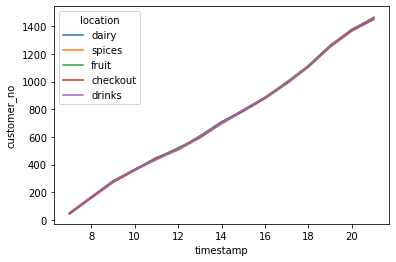

In [97]:
sns.lineplot(df.index.hour,df["customer_no"],hue=df["location"])
